# Remote Work - A Stack Overflow Survey Analysis
### Solving data science problems using CRISP-DM
---


This study attempts to undertake a data driven analysis on Remote Work. This work specifically follows CRISP-DM, a methodology to tackle data science problems.  
### 1. Business Understanding
It is essential to understand our objective and the need of the analysis. We define our 4 main business questions.  
1. Are developers who work remotely more satisfied with the job?  
2. Do remote workers earn more?  
3. In what type of organisations is remote work popular?  
4. What are the most common challenges faced when working remotely?

### 2. Data Understanding

Once we have an idea of the business questions, let us understand the data better and how we can answer the questions.

In [191]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [202]:
#read neccesary data
data = pd.read_csv('data/survey_results_public.csv')
schema = pd.read_csv('data/survey_results_schema.csv')

In [203]:
#explore the data
print(data.shape)
data.head()

(88883, 85)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [204]:
#Check the schema of the data
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
...,...,...
80,Sexuality,Which of the following do you currently identi...
81,Ethnicity,Which of the following do you identify as? Ple...
82,Dependents,"Do you have any dependents (e.g., children, el..."
83,SurveyLength,How do you feel about the length of the survey...


In [205]:
#Exploring the columns of the data
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

Text(0.5, 1.0, 'Distribution of the ability to work remote')

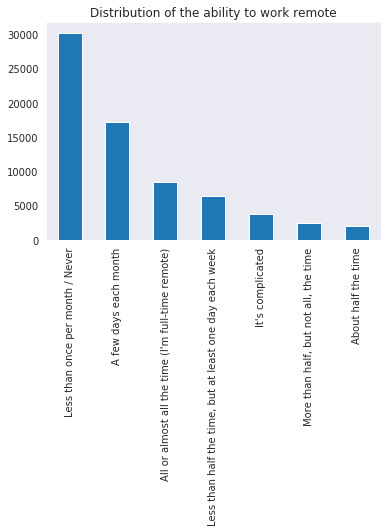

In [206]:
data['WorkRemote'].value_counts().plot(kind='bar');
plt.title('Distribution of the ability to work remote')

We can conclude that these columns below are of our interest.  
- WorkRemote --> Target group
- JobSat --> Job Satisfaction
- ConvertedComp --> Salary
- OrgSize --> Type of Organization
- WorkChallenge  --> Challenges faced

In [207]:
data = data[['Respondent','WorkRemote', 'JobSat','ConvertedComp','OrgSize','WorkChallenge']]
data.columns = ['Respondent','WorkRemote','JobSat','AvgSalary','OrgSize','WorkChallenge']
data.head()

,Respondent,WorkRemote,JobSat,AvgSalary,OrgSize,WorkChallenge
0,1,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN
2,3,Less than once per month / Never,Slightly satisfied,8820.0,100 to 499 employees,Distracting work environment;Inadequate access...
3,4,Less than once per month / Never,Slightly satisfied,61000.0,100 to 499 employees,NaN
4,5,A few days each month,Slightly dissatisfied,NaN,"10,000 or more employees",Being tasked with non-development work;Inadequ...


### 3. Data Preparation

In [208]:
data['WorkRemote'].value_counts()

Less than once per month / Never                           30220
A few days each month                                      17242
All or almost all the time (I'm full-time remote)           8465
Less than half the time, but at least one day each week     6320
It's complicated                                            3675
More than half, but not all, the time                       2376
About half the time                                         1986
Name: WorkRemote, dtype: int64

In [209]:
def classify_remote(data):
    ''''''
    data['WorkRemote'].replace('Less than once per month / Never','Not Remote', inplace = True)
    data['WorkRemote'].replace('A few days each month', 'Partially Remote', inplace = True)    
    data['WorkRemote'].replace( "All or almost all the time (I'm full-time remote)",'Full-time Remote', inplace = True)
    data['WorkRemote'].replace( 'Less than half the time, but at least one day each week','Partially Remote', inplace = True)
    data['WorkRemote'].replace('It\'s complicated','Not Remote', inplace = True)
    data['WorkRemote'].replace('More than half, but not all, the time','Partially Remote',inplace = True)
    data['WorkRemote'].replace('About half the time','Partially Remote', inplace = True)
    return data

data = classify_remote(data)

In [210]:
data.head()

,Respondent,WorkRemote,JobSat,AvgSalary,OrgSize,WorkChallenge
0,1,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN
2,3,Not Remote,Slightly satisfied,8820.0,100 to 499 employees,Distracting work environment;Inadequate access...
3,4,Not Remote,Slightly satisfied,61000.0,100 to 499 employees,NaN
4,5,Partially Remote,Slightly dissatisfied,NaN,"10,000 or more employees",Being tasked with non-development work;Inadequ...


In [211]:
data['WorkRemote'].value_counts()

Not Remote          33895
Partially Remote    27924
Full-time Remote     8465
Name: WorkRemote, dtype: int64

In [296]:
data_jobsat = data[['Respondent','WorkRemote','JobSat']].dropna(how="any").reset_index(drop=True)
data_org = data[['Respondent','WorkRemote','OrgSize']].dropna(how="any").reset_index(drop=True)
data_sal = data[['Respondent','WorkRemote','AvgSalary']].dropna(how="any").reset_index(drop=True)
data_challenge = data[['Respondent','WorkRemote','WorkChallenge']].dropna(how="any").reset_index(drop=True)

print(data.shape)
print(data_jobsat.shape)
print(data_org.shape)
print(data_sal.shape)
print(data_challenge.shape)

(88883, 6)
(70098, 3)
(68378, 3)
(55675, 3)
(67800, 3)


### 4. Modelling/Analysis

#### 4.1.Working Remote vs Job Satisfaction

In [213]:
data['JobSat'].value_counts(normalize=True)

Slightly satisfied                    0.341001
Very satisfied                        0.316279
Slightly dissatisfied                 0.151462
Neither satisfied nor dissatisfied    0.122838
Very dissatisfied                     0.068420
Name: JobSat, dtype: float64

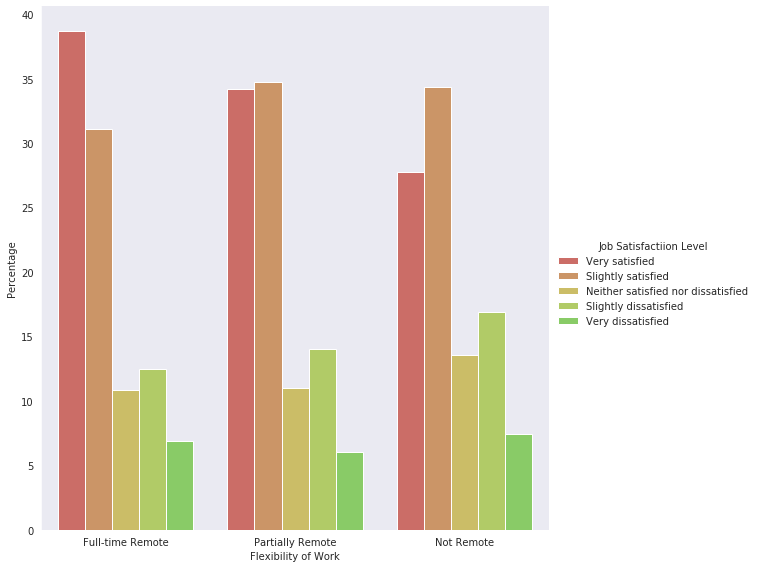

In [214]:
(data_jobsat
.groupby('WorkRemote')['JobSat']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'),height = 8,aspect =1, x='WorkRemote',y='percent',hue='JobSat',kind='bar',
      order=['Full-time Remote','Partially Remote','Not Remote'],
      hue_order = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied","Very dissatisfied"],
      palette=sns.color_palette("hls",15)).set(xlabel='Flexibility of Work', ylabel='Percentage')._legend.set_title("Job Satisfactiion Level"))
plt.savefig('output/job_sat1.png')

In [215]:
#convert to likert scales for better analysis

def to_likert(data):
    ''''''
    data['JobSat'].replace('Very satisfied',5, inplace = True)
    data['JobSat'].replace('Slightly satisfied',4, inplace = True)    
    data['JobSat'].replace( "Neither satisfied nor dissatisfied",3, inplace = True)
    data['JobSat'].replace( 'Slightly dissatisfied',2, inplace = True)
    data['JobSat'].replace('Very dissatisfied',1, inplace = True)
    return data

data_jobsat_levels = to_likert(data_jobsat)

In [242]:
df = pd.DataFrame(data_jobsat_levels.groupby('WorkRemote')['JobSat'].mean().rename('Average Job Satisfaction Score'))
df.loc[['Not Remote', 'Partially Remote','Full-time Remote'], :]

,Average Job Satisfaction Score
WorkRemote,
Not Remote,3.582090
Partially Remote,3.770338
Full-time Remote,3.822609


#### 4.2.Working Remote vs Average Salary

In [276]:
df = pd.DataFrame(data_sal.groupby('WorkRemote')['AvgSalary'].mean().rename('Average Salary in USD').reset_index())
#df = df.loc[['Not Remote', 'Partially Remote','Full-time Remote'], :]
df

,WorkRemote,Average Salary in USD
0,Full-time Remote,139081.902855
1,Not Remote,110061.496315
2,Partially Remote,144014.047097


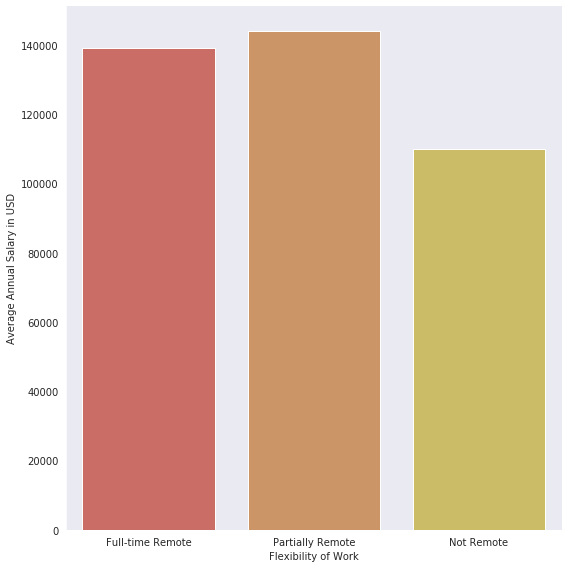

In [256]:
sns.catplot(data = df, height = 8,aspect =1, x='WorkRemote',y='Average Salary in USD',kind='bar',
            order=['Full-time Remote','Partially Remote','Not Remote'], 
            palette=sns.color_palette("hls",15)).set(xlabel='Flexibility of Work', ylabel='Average Annual Salary in USD');
plt.savefig('output/average_salary.png')

#### 4.3. Type of Organizations for Remote Workers

In [282]:
df =data_org[data_org['WorkRemote']=='Full-time Remote']['OrgSize'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
df.columns = ['Type of Organization', 'Percentage']
df.at[0,'Type of Organization'] ='Freelancer/ Sole Proprietor'
df

,Type of Organization,Percentage
0,Freelancer/ Sole Proprietor,23.866117
1,2-9 employees,20.252244
2,20 to 99 employees,16.771768
3,100 to 499 employees,11.775406
4,10 to 19 employees,10.647587
5,"10,000 or more employees",6.051419
6,"1,000 to 4,999 employees",5.056997
7,500 to 999 employees,3.820034
8,"5,000 to 9,999 employees",1.758428


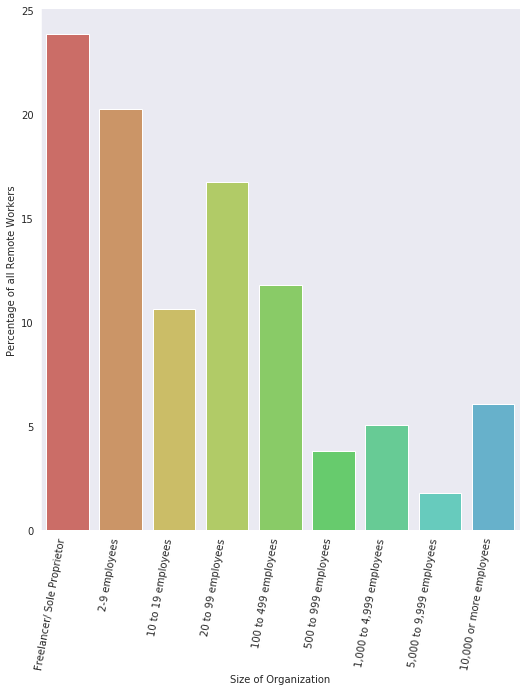

In [293]:
sns.catplot(data = df, height = 8,aspect =1, x='Type of Organization',y='Percentage',kind='bar',
            order=['Freelancer/ Sole Proprietor','2-9 employees','10 to 19 employees','20 to 99 employees','100 to 499 employees','500 to 999 employees',
                  '1,000 to 4,999 employees','5,000 to 9,999 employees','10,000 or more employees'], 
            palette=sns.color_palette("hls",15)).set(xlabel='Size of Organization', ylabel='Percentage of all Remote Workers').set_xticklabels(rotation=80, ha="right");
plt.savefig('output/org_type.png')

#### 4.4. Challenges whe you start working remote?

In [355]:
data_challenge_remote = data_challenge[data_challenge['WorkRemote']=='Full-time Remote']
challenges = pd.Series(data_challenge_remote.WorkChallenge.str.split(';').sum()).value_counts().rename_axis('Work Challenge').reset_index(name='Counts')
challenges['Percentage'] = challenges['Counts']*100/data_challenge_remote.shape[0]

In [372]:
challenges.at[2,'Work Challenge'] = 'Non-work commitments'

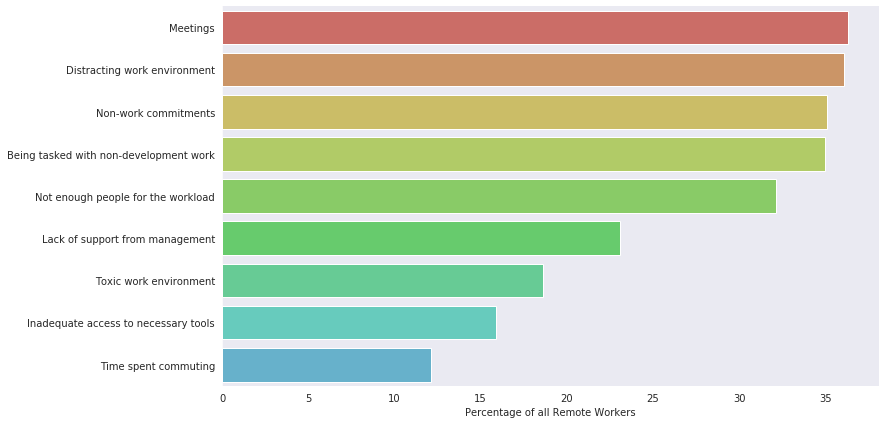

In [375]:
sns.catplot(data = challenges, height =6,aspect =2.1, x='Percentage',y='Work Challenge',kind='bar',orient='h',
            palette=sns.color_palette("hls",15)).set(xlabel='Percentage of all Remote Workers', ylabel='');
plt.savefig('output/challenges.png')

### 5. Evalution

1. It can be noted that there actually is a correlation between Job Satisfaction and working remote. Full-time remote workers tend to be more satisfied against Not remote workers.
2. It was discovered that Parlially Remote Workers earn the most. There is a clear distrinction between earning between people who are working remote vs not working remote.
3. It was understood that mostly small-scall organizations are accomadating remote workers. Majority of them are freelancers or have their own firm.
4. Meetings, distracting work environment and non-work commitments are the most common challenges faced when working remote.


### 6. Deployment

Please find the linked medium article that communicates the summarized findings of this analysis.